In [33]:
#Visualising the pollynomial regression model results
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
%matplotlib inline
#Lectura de Datos
df =pd.read_csv("WHO-COVID-19-global-data.csv",sep=",")
df.info

<bound method DataFrame.info of        Date_reported Country_code      Country WHO_region  New_cases  \
0         2020-01-03           AF  Afghanistan       EMRO          0   
1         2020-01-04           AF  Afghanistan       EMRO          0   
2         2020-01-05           AF  Afghanistan       EMRO          0   
3         2020-01-06           AF  Afghanistan       EMRO          0   
4         2020-01-07           AF  Afghanistan       EMRO          0   
...              ...          ...          ...        ...        ...   
170872    2021-12-19           ZW     Zimbabwe       AFRO       2106   
170873    2021-12-20           ZW     Zimbabwe       AFRO       1123   
170874    2021-12-21           ZW     Zimbabwe       AFRO       2283   
170875    2021-12-22           ZW     Zimbabwe       AFRO       2689   
170876    2021-12-23           ZW     Zimbabwe       AFRO       1636   

        Cumulative_cases  New_deaths  Cumulative_deaths  
0                      0           0         

In [34]:
datita = df.loc[df['Country'] == 'Afghanistan']
datita['Date_reported'] = datita['Date_reported'].astype('category').cat.codes
posx = datita.columns.get_loc('Date_reported')
posy= datita.columns.get_loc('New_cases')
x = datita.iloc[:,posx].values.reshape(-1,1)
y = datita.iloc[:,posy].values

C:\Users\HEIDYC~1\AppData\Local\Temp/ipykernel_19304/1206723849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datita['Date_reported'] = datita['Date_reported'].astype('category').cat.codes


In [35]:
poly_reg=PolynomialFeatures(degree=4)
X_poly=poly_reg.fit_transform(x)
poly_reg.fit(X_poly,y)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y)

LinearRegression()

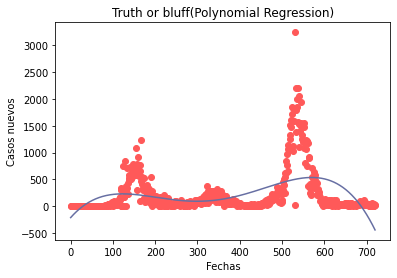

In [41]:
#Visualising the pollynomial regression model results
X_grid=np.arange(min(x),max(x),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(x,y,color='#FF5959')
plt.plot(x,lin_reg2.predict(poly_reg.fit_transform(x)),color='#676FA3')
plt.title('Truth or bluff(Polynomial Regression)')
plt.xlabel('Fechas')
plt.ylabel('Casos nuevos')
plt.show()

<AxesSubplot:>

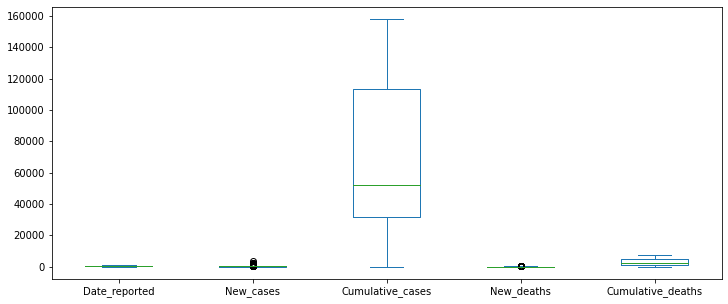

In [10]:
#Diagrama caja de bigotes, los cuales indican los outlayers
datita.plot.box(return_type='axes', vert=True, figsize=(12,5))

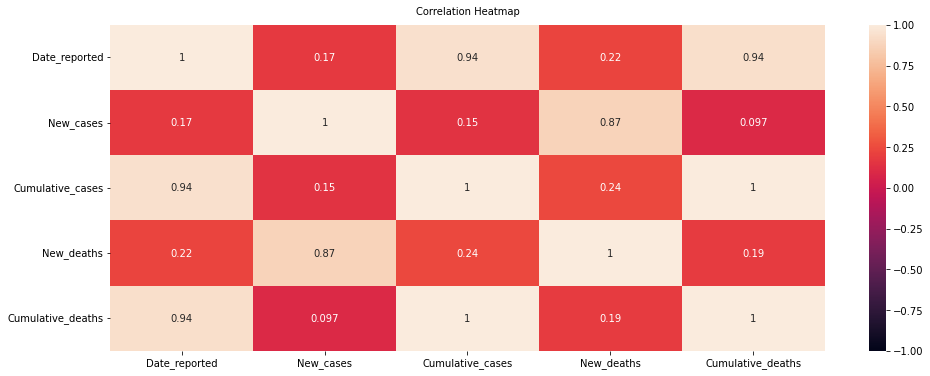

In [12]:
#Se podria decir que se pueden relacionar arriba del 50%
import seaborn as sns
plt.figure(figsize=(16, 6))
heatmap=sns.heatmap(datita.corr(),vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation and Heatmap', fontdict={'fontsize':10}, pad=10)
#plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [25]:
def poly_reg(degrees, x_test, y_test):
    features = PolynomialFeatures(degree=degrees)
    x_test_transformed = features.fit_transform(x_test)
    model = LinearRegression()
    model.fit(x_test_transformed,y_test)
    test_pred = model.predict(x_test_transformed)
    rmse_poly = mean_squared_error(y_test, test_pred, squared = False)

    return [rmse_poly]

In [29]:
errors = []

for i in range(26):
    errors.append([i] + poly_reg(i, x, y))
    
df2 = pd.DataFrame(errors, columns = ['degree','data'])

C:\Users\HEIDYC~1\AppData\Local\Temp/ipykernel_19304/2584635226.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(df2['degree'], df2['data'], 'o-r', label = 'Data',color='#676FA3')


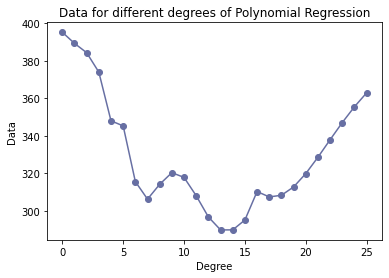

In [42]:
plt.plot(df2['degree'], df2['data'], 'o-r', label = 'Data',color='#676FA3')
plt.xlabel('Degree')
plt.ylabel('Data')
plt.title('Data for different degrees of Polynomial Regression')
plt.show();